# Project: The Impact of Vaccines on Covid-19 Death Rates

## Project Introduction:

In this project, we will be using Covid and Vaccine data from WHO and combine them to determine things about the covid data, such as how effective are the vaccines, which vaccines are the best, death rates per country based on vaccines given, etc... 

First, lets start by importing the necessary libraries for Data Analysis and Visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Now lets load the Covid and Vaccine data from WHO.

In [3]:
main = pd.read_csv("WHO-COVID-19-global-data.csv")
vaccine = pd.read_csv("vaccination-data.csv")
vaccine.head(10)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2/27/2022,5535254,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,Albania,ALB,EURO,REPORTING,2/20/2022,2707658,1284034.0,94.100,45.118,1192155.0,41.889,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",1/13/2021,5.0
2,Algeria,DZA,AFRO,REPORTING,2/20/2022,13631683,7456361.0,31.086,17.004,6076272.0,13.857,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",1/30/2021,4.0
3,American Samoa,ASM,WPRO,REPORTING,2/16/2022,85050,42212.0,154.084,76.475,37805.0,68.491,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",12/21/2020,3.0
4,Andorra,AND,EURO,REPORTING,2/13/2022,142420,57797.0,184.300,75.872,53250.0,69.903,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",1/20/2021,3.0
5,Angola,AGO,AFRO,REPORTING,2/22/2022,16259606,10591264.0,49.472,32.225,5448403.0,16.577,SII - Covishield,3/10/2021,1.0
6,Anguilla,AIA,AMRO,REPORTING,2/25/2022,22165,10370.0,147.747,69.124,9531.0,63.532,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",2/5/2021,2.0
7,Antigua and Barbuda,ATG,AMRO,REPORTING,2/25/2022,124726,63582.0,127.364,64.927,61144.0,62.437,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",3/1/2021,6.0
8,Argentina,ARG,AMRO,REPORTING,2/25/2022,93008081,40572052.0,205.789,89.770,36237826.0,80.180,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",12/29/2020,7.0
9,Armenia,ARM,EURO,REPORTING,2/13/2022,1971565,1080404.0,66.500,36.460,872336.0,29.439,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",6/16/2021,5.0


## Changes Made:

We will merge both of the datasets based on Country and WHO_REGION. This will give us a better way to understand both of the vaccine and Covid data better side-by-side and will give us the correct Countries that overlap based on Country attributes.

In [36]:
main = main.rename(columns={"WHO_region": "WHO_REGION", "Country": "COUNTRY"})
main = main.merge(vaccine, how='outer', on=['WHO_REGION', 'COUNTRY'])
main = main.dropna(subset=['Date_reported'])
# main.loc[:, "COUNTRY"].value_counts()
# main

In [37]:
main.loc[:, "COUNTRY"].value_counts()          # There are a total of 781 dates for 237 countries

Afghanistan        781
Paraguay           781
Nigeria            781
Niue               781
North Macedonia    781
                  ... 
Grenada            781
Guadeloupe         781
Guam               781
Guatemala          781
Zimbabwe           781
Name: COUNTRY, Length: 237, dtype: int64

Assumption 1: We changed the WHO_region and Country in **main** to match the WHO_REGION and COUNTRY in **vaccine**. <br>
Assumption 2: We will analyze/visualize data for 237 countries featured in the main dataset.

## Data Cleaning:

Now that we've combined both *main* and *vaccine* datasets, we will clean the data further by dropping the columns which will not be useful for our analysis.

In [40]:
if 'Country_code' in main.columns and 'ISO3' in main.columns and 'DATA_SOURCE' in main.columns:
    main = main.drop(columns=['Country_code', 'ISO3', 'DATA_SOURCE'])   # Cleaned Data
print(main.head())

  Date_reported      COUNTRY WHO_REGION  New_cases  Cumulative_cases  \
0      1/3/2020  Afghanistan       EMRO        0.0               0.0   
1      1/4/2020  Afghanistan       EMRO        0.0               0.0   
2      1/5/2020  Afghanistan       EMRO        0.0               0.0   
3      1/6/2020  Afghanistan       EMRO        0.0               0.0   
4      1/7/2020  Afghanistan       EMRO        0.0               0.0   

   New_deaths  Cumulative_deaths  TOTAL_VACCINATIONS_x  \
0         0.0                0.0             5535254.0   
1         0.0                0.0             5535254.0   
2         0.0                0.0             5535254.0   
3         0.0                0.0             5535254.0   
4         0.0                0.0             5535254.0   

   PERSONS_VACCINATED_1PLUS_DOSE_x  TOTAL_VACCINATIONS_PER100_x  ...  \
0                        4907058.0                       14.219  ...   
1                        4907058.0                       14.219  ...   
2 

In [39]:
print(main.head(150))

    Date_reported      COUNTRY WHO_REGION  New_cases  Cumulative_cases  \
0        1/3/2020  Afghanistan       EMRO        0.0               0.0   
1        1/4/2020  Afghanistan       EMRO        0.0               0.0   
2        1/5/2020  Afghanistan       EMRO        0.0               0.0   
3        1/6/2020  Afghanistan       EMRO        0.0               0.0   
4        1/7/2020  Afghanistan       EMRO        0.0               0.0   
..            ...          ...        ...        ...               ...   
145     5/27/2020  Afghanistan       EMRO      548.0           12465.0   
146     5/28/2020  Afghanistan       EMRO      637.0           13102.0   
147     5/29/2020  Afghanistan       EMRO      643.0           13745.0   
148     5/30/2020  Afghanistan       EMRO      784.0           14529.0   
149     5/31/2020  Afghanistan       EMRO      651.0           15180.0   

     New_deaths  Cumulative_deaths  TOTAL_VACCINATIONS_x  \
0           0.0                0.0             5535

Lastly we will remove redundant/replicated data and put them in seperate Dataframes based on country (this includes the first_vaccine_date, number_vaccines_types_used and date_updated).This will help us get better understandings based on comparisons between different attributes based on Country.

In [33]:
#make table for all first_vaccine_dates per country and get rid of it in the main dataset to have less duplicate redundant data
if 'FIRST_VACCINE_DATE' in main.columns:
    first_vaccine_dates = main[['COUNTRY', "FIRST_VACCINE_DATE"]]
    first_vaccine_dates = first_vaccine_dates.drop_duplicates()
    first_vaccine_dates['FIRST_VACCINE_DATE'] = pd.to_datetime(first_vaccine_dates['FIRST_VACCINE_DATE'])
if 'FIRST_VACCINE_DATE' in main.columns:
    main = main.drop(columns=['FIRST_VACCINE_DATE'])
if 'DATE_UPDATED' in main.columns:
    main = main.drop(columns=['DATE_UPDATED'])
first_vaccine_dates = first_vaccine_dates.sort_values(by='FIRST_VACCINE_DATE')


## Exploratory Data Analysis:

In [34]:
#Data analysis: 
print(first_vaccine_dates[0:206])
print(first_vaccine_dates[207:len(first_vaccine_dates)])

vaxxedCountries = first_vaccine_dates[0:206]
unvaxxedCountries = first_vaccine_dates[207:len(first_vaccine_dates)]

                                 COUNTRY FIRST_VACCINE_DATE
32802                              China         2020-07-22
11715                            Bahrain         2020-11-04
89034   Lao People's Democratic Republic         2020-11-25
28897                             Canada         2020-12-14
176506          United States of America         2020-12-14
...                                  ...                ...
7029                             Armenia         2021-06-16
106216                            Monaco         2021-06-30
167134                           Tokelau         2021-07-20
175725       United Republic of Tanzania         2021-07-28
25773                            Burundi         2021-10-18

[206 rows x 2 columns]
                                                  COUNTRY FIRST_VACCINE_DATE
20306                              Bosnia and Herzegovina                NaT
39050                                                Cuba                NaT
42174               Democ

After cleaning the data, we printed the first_vaccine_dates table (sorted by dates) and checked to see which Countries have vaccines. This information may be useful to see comparisons in cases between countries which have a vaccine and the ones that don't. After inspecting the dates, we found that there are 206 Countries that have a vaccine and the rest do not. We seperated these 2 types into 2 different Dataframes, called vaxxedCountries and unvaxxedCountries.

## Visualizations:

## Visualization 1: How new cases were effected after the first vaccinations were released 
By William Kopec

What I did in this visualization was to get subdata where I would only get information from the US and use only relevant information for this visualization. After I broke the data into sub-data, I used the FIRST_VACCINE_DATE to figure out when the first vaccination was given (12/14/2020). I then split the data even further, getting only the information from dates which are 60 days before and 60 days after the first vaccine. Lastly I plotted the amount of new cases for those dates to see how new cases were effected 60 days before and after the first vaccination was given.

In [42]:
import datetime
print(first_vaccine_dates[['COUNTRY','FIRST_VACCINE_DATE']].loc[first_vaccine_dates['COUNTRY'] == 'United States of America'])
print()
subData1 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'United States of America'])
subData1['Date_reported'] = pd.to_datetime(subData1['Date_reported'])
subData1 = subData1[296:416]
print(subData1.head(100))

                         COUNTRY FIRST_VACCINE_DATE
176506  United States of America         2020-12-14

                         COUNTRY Date_reported  New_cases
176802  United States of America    2020-10-25    82394.0
176803  United States of America    2020-10-26    75936.0
176804  United States of America    2020-10-27    65719.0
176805  United States of America    2020-10-28    69708.0
176806  United States of America    2020-10-29    75245.0
...                          ...           ...        ...
176897  United States of America    2021-01-28   147131.0
176898  United States of America    2021-01-29   159273.0
176899  United States of America    2021-01-30   156726.0
176900  United States of America    2021-01-31   163677.0
176901  United States of America    2021-02-01   137068.0

[100 rows x 3 columns]


['2020-12-14T00:00:00.000000000']


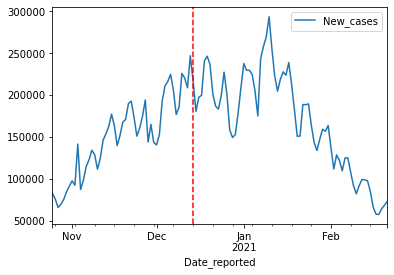

In [77]:
import seaborn as sns
ax1 = subData1.plot.line(x='Date_reported', y='New_cases')
#Get the first vaccination date for USA
first_vax_date = first_vaccine_dates['FIRST_VACCINE_DATE'].loc[first_vaccine_dates['COUNTRY'] == 'United States of America'].values
#plot the first vaccination date on the graph
ax1.axvline(first_vax_date, color="red", linestyle="--")

As shown in the data, the amount of new cases were increasing at a steady rate for 60 days before the first vaccination was given, then on 12/14/2020 (as indicated by the red line), the first vaccines were released and the new cases slowly consolidated between 150,000-250,000 new cases daily before breaking over 300,000 and decreasing at a dramatic rate. Although the rates reached a new high after the vaccines were released, it does not prove that vaccines were not effective, in this case, we have to account for the fact that the big spike may have been due to holiday season (End of December - Early January).

## Machine Learning Analysis:

## Reflection: